In [45]:
import random

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures

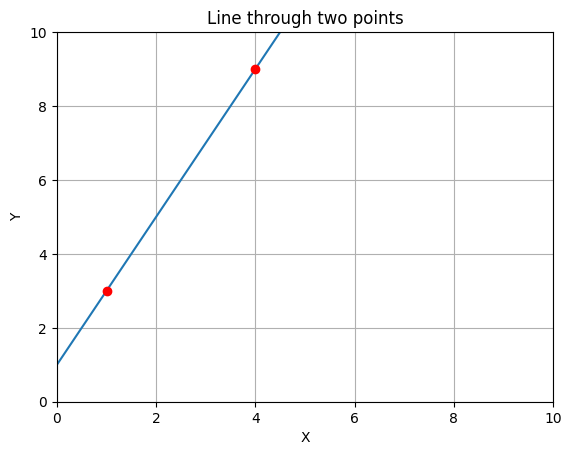

In [3]:
def draw_line(point1, point2):
    plt.figure()

    # The line will be drawn all the way from (0,0) to (10,10)
    x_values = np.linspace(0, 10, 200)
    
    # Calculate the slope and intercept of the line
    slope = (point2[1] - point1[1]) / (point2[0] - point1[0])
    intercept = point1[1] - slope * point1[0]
    
    # Generate y-values based on the equation of the line
    y_values = slope * x_values + intercept
    
    # Plot the line
    plt.plot(x_values, y_values, '-')
    # Plot the points
    plt.plot([point1[0], point2[0]], [point1[1], point2[1]], 'ro')

    plt.title('Line through two points')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.grid(True)
    plt.show()

# Let's assume points (1, 3) and (4, 9)
draw_line((1, 3), (4, 9))

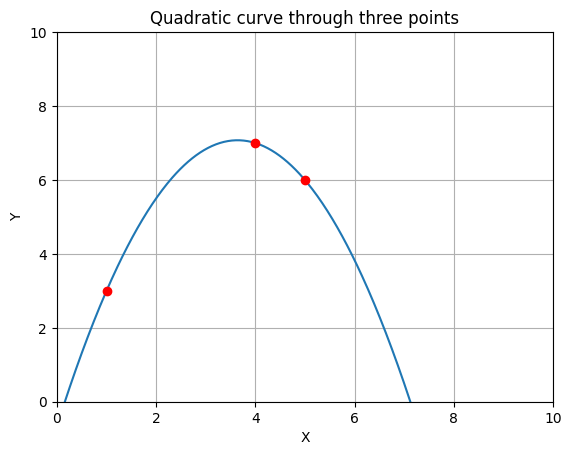

In [11]:
def draw_parabola(point1, point2, point3):
    plt.figure()

    x = np.array([point1[0], point2[0], point3[0]])
    y = np.array([point1[1], point2[1], point3[1]])
    
    coefficients = np.polyfit(x, y, 2)
    p = np.poly1d(coefficients)
    
    xp = np.linspace(0, 10, 500)
    plt.plot(xp, p(xp), '-', x, y, 'ro')
    plt.title('Quadratic curve through three points')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.grid(True)
    plt.show()

# Let's assume points (1, 3), (2, 7) and (3, 6)
draw_parabola((1, 3), (4, 7), (5, 6))

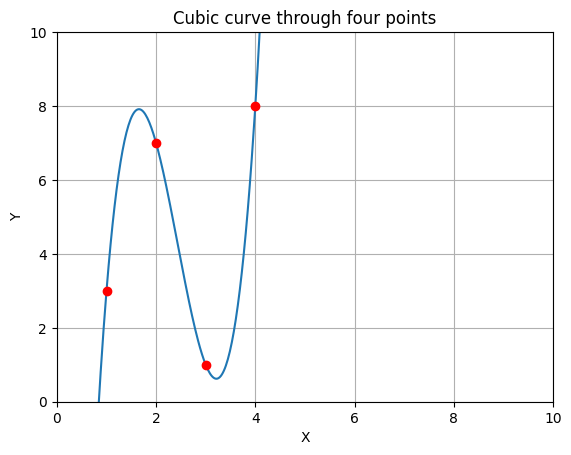

In [9]:
def draw_curve(point1, point2, point3, point4):
    plt.figure()

    x = np.array([point1[0], point2[0], point3[0], point4[0]])
    y = np.array([point1[1], point2[1], point3[1], point4[1]])
    
    coefficients = np.polyfit(x, y, 3)
    p = np.poly1d(coefficients)
    
    xp = np.linspace(0, 10, 500)
    plt.plot(xp, p(xp), '-', x, y, 'ro')
    plt.title('Cubic curve through four points')
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()

# Let's assume points (1, 3), (2, 7), (3, 6) and (4, 2)
draw_curve((1, 3), (2, 7), (3, 1), (4, 8))


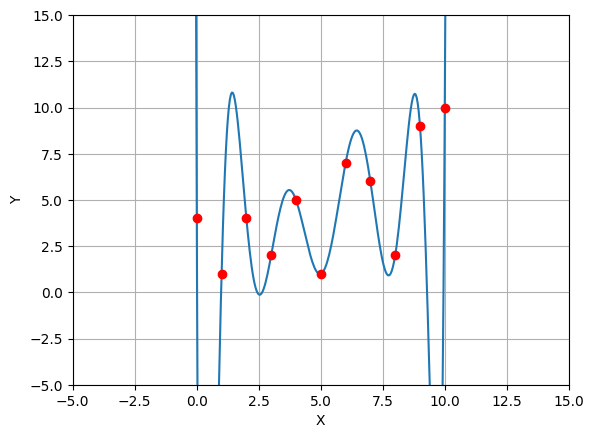

In [23]:
def draw_high_order_polynomial():
    plt.figure()

    # 11 evenly distributed points from 0 to 10
    x = np.linspace(0, 10, 11)
    y = np.array([4, 1, 4, 2, 5, 1, 7, 6, 2, 9, 10])

    # Calculate the coefficients of the polynomial
    coefficients = np.polyfit(x, y, 10)
    p = np.poly1d(coefficients)

    # Generate a finer grid for plotting the polynomial
    xp = np.linspace(-5, 15, 500)
    plt.plot(xp, p(xp), '-', x, y, 'ro')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.xlim(-5, 15)
    plt.ylim(-5, 15)
    plt.grid(True)
    plt.show()

draw_high_order_polynomial()


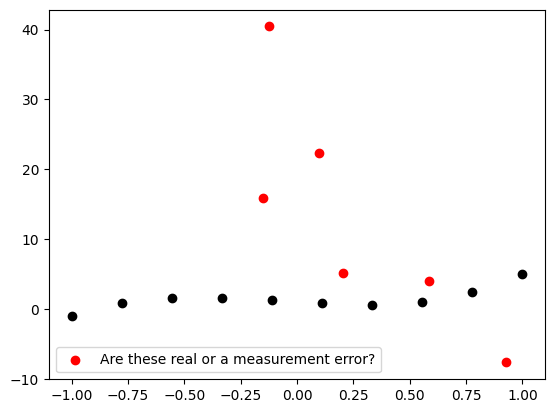

In [72]:
np.random.seed(0)

# Generate the "clean" data
x = np.linspace(-1, 1, 10)
y = 5*x**3 + x**2 - 2*x + 1  # Cubic function

outlier_x = []
outlier_y = []

# Add some extreme outliers
for _ in range(6):
    # choose a random x-value in our range
    x_data = np.random.uniform(-1, 1)
    outlier_x.append(x_data)
    # create a corresponding y-value that is far from the "true" cubic function
    y_data = 5*x_data**3 + x_data**2 - 2*x_data + 1 + np.random.uniform(-50, 50)
    outlier_y.append(y_data)
    
#    x = np.append(x, outlier_x)
#    y = np.append(y, outlier_y)

# Convert x from 1D array to 2D array for sklearn
X = x[:, np.newaxis]

# Fit L2 (least squares) regression
poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(X)
l2_model = LinearRegression()
l2_model.fit(X_poly, y)

# Fit L1 (Lasso) regression
l1_model = Lasso(alpha=0.01)
l1_model.fit(X_poly, y)

# Generate a fine grid of x values for our plot
X_plot = np.linspace(-1, 1, 500)[:, np.newaxis]
X_plot_poly = poly.transform(X_plot)

# Compute the model predictions over our plot grid
y_l2 = l2_model.predict(X_plot_poly)
y_l1 = l1_model.predict(X_plot_poly)

# Plot the data and the two regression lines
plt.scatter(x, y, color='black')
plt.scatter(outlier_x, outlier_y, color='red', label="Are these real or a measurement error?")
#plt.plot(X_plot, y_l2, color='blue', label='L2: (f(X) - y)^2')
#plt.plot(X_plot, y_l1, color='red', label='L1: |f(X) - y|')
plt.legend()
plt.show()


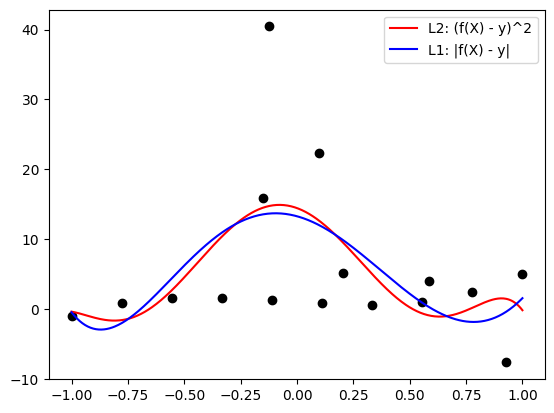

In [82]:
np.random.seed(0)

# Generate the "clean" data
x = np.linspace(-1, 1, 10)
y = 5*x**3 + x**2 - 2*x + 1  # Cubic function

#outlier_x = []
#outlier_y = []

# Add some extreme outliers
for _ in range(6):
    # choose a random x-value in our range
    x_data = np.random.uniform(-1, 1)
    #outlier_x.append(x_data)
    # create a corresponding y-value that is far from the "true" cubic function
    y_data = 5*x_data**3 + x_data**2 - 2*x_data + 1 + np.random.uniform(-50, 50)
    #outlier_y.append(y_data)
    
    x = np.append(x, x_data)
    y = np.append(y, y_data)

# Convert x from 1D array to 2D array for sklearn
X = x[:, np.newaxis]

# Fit L2 (least squares) regression
poly = PolynomialFeatures(degree=6)
X_poly = poly.fit_transform(X)
l2_model = LinearRegression()
l2_model.fit(X_poly, y)

# Fit L1 (Lasso) regression
l1_model = Lasso(alpha=0.01)
l1_model.fit(X_poly, y)

# Generate a fine grid of x values for our plot
X_plot = np.linspace(-1, 1, 500)[:, np.newaxis]
X_plot_poly = poly.transform(X_plot)

# Compute the model predictions over our plot grid
y_l2 = l2_model.predict(X_plot_poly)
y_l1 = l1_model.predict(X_plot_poly)

# Plot the data and the two regression lines
plt.scatter(x, y, color='black')
#plt.scatter(outlier_x, outlier_y, color='red', label="Are these real or a measurement error?")
plt.plot(X_plot, y_l2, color='red', label='L2: (f(X) - y)^2')
plt.plot(X_plot, y_l1, color='blue', label='L1: |f(X) - y|')
plt.legend()
plt.show()
